In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in data

BP=pd.read_csv('data/con_var/BP.csv')
Tmp=pd.read_csv('data/con_var/TEM.csv')
RH=pd.read_csv('data/con_var/RH.csv')

In [3]:
BP.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,BG1,BP,01/01/2019 00:00,1029.0,mBar,P
1,BG1,BP,01/01/2019 01:00,1029.0,mBar,P
2,BG1,BP,01/01/2019 02:00,1029.0,mBar,P
3,BG1,BP,01/01/2019 03:00,1029.0,mBar,P
4,BG1,BP,01/01/2019 04:00,1029.0,mBar,P


In [4]:
def take_mean(df):
    new_df=df.iloc[:8760].copy()
    for site in df['Site'].unique().tolist()[1:]:
        new_df[site]=df[df['Site']==site]['Value'].values
    new_df=new_df.drop(['Site','Species','Units','Provisional or Ratified'],axis=1)
    new_df.rename(columns={'Value':df['Site'].unique().tolist()[0]},inplace=True)
    new_df['Mean']=new_df.drop('ReadingDateTime',axis=1).mean(axis=1)
    return new_df

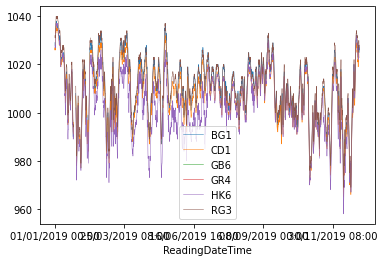

In [5]:
# plot the data
fig,ax=plt.subplots()

for key, grp in BP.groupby(['Site']):
    ax = grp.plot(ax=ax, kind='line', x='ReadingDateTime', y='Value', label=key,linewidth=0.5)

plt.legend(loc='best')

plt.show()

In [6]:
LD_BP=take_mean(BP)
LD_BP=LD_BP[['ReadingDateTime','Mean']]
LD_BP.rename(columns={'Mean':'BP'},inplace=True)
LD_BP

,ReadingDateTime,BP
0,01/01/2019 00:00,1028.75
1,01/01/2019 01:00,1028.75
2,01/01/2019 02:00,1028.75
3,01/01/2019 03:00,1028.50
4,01/01/2019 04:00,1028.25
...,...,...
8755,31/12/2019 19:00,1025.75
8756,31/12/2019 20:00,1025.75
8757,31/12/2019 21:00,1025.75
8758,31/12/2019 22:00,1025.75


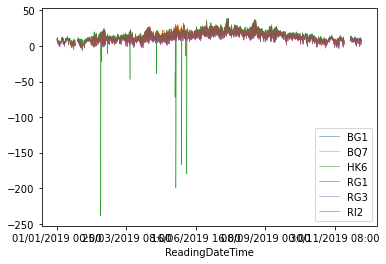

In [7]:
fig,ax=plt.subplots()

for key, grp in Tmp.groupby(['Site']):
    ax = grp.plot(ax=ax, kind='line', x='ReadingDateTime', y='Value', label=key,linewidth=0.5)

plt.legend(loc='best')

plt.show()

In [8]:
# Remove the site with a lot of abnormal data
Tmp=Tmp[Tmp['Site']!='HK6']

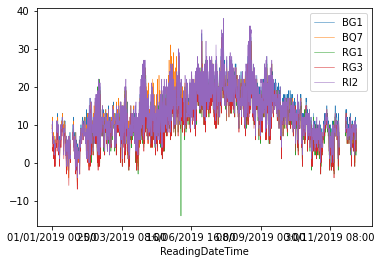

In [9]:
fig,ax=plt.subplots()

for key, grp in Tmp.groupby(['Site']):
    ax = grp.plot(ax=ax, kind='line', x='ReadingDateTime', y='Value', label=key,linewidth=0.5)

plt.legend(loc='best')

plt.show()

In [10]:
# Examine the questionable data point
Tmp[Tmp['Value'] < -10]

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
21231,RG1,TMP,04/06/2019 15:00,-14.0,oC,P


In [11]:
#delete it
Tmp.loc[21231,'Value']=None

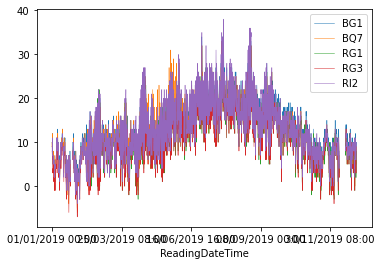

In [12]:
fig,ax=plt.subplots()

for key, grp in Tmp.groupby(['Site']):
    ax = grp.plot(ax=ax, kind='line', x='ReadingDateTime', y='Value', label=key,linewidth=0.5)

plt.legend(loc='best')

plt.show()

In [13]:
LD_Tmp=take_mean(Tmp)
LD_Tmp=LD_Tmp[['ReadingDateTime','Mean']]
LD_Tmp.rename(columns={'Mean':'Tmp'},inplace=True)
LD_Tmp

,ReadingDateTime,Tmp
0,01/01/2019 00:00,9.00
1,01/01/2019 01:00,9.00
2,01/01/2019 02:00,9.00
3,01/01/2019 03:00,9.25
4,01/01/2019 04:00,9.00
...,...,...
8755,31/12/2019 19:00,8.20
8756,31/12/2019 20:00,8.00
8757,31/12/2019 21:00,7.20
8758,31/12/2019 22:00,6.00


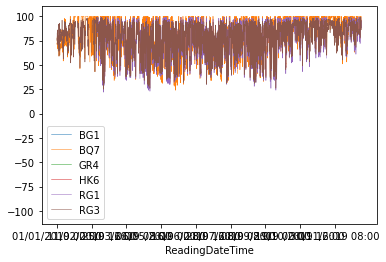

In [14]:
fig,ax=plt.subplots()

for key, grp in RH.groupby(['Site']):
    ax = grp.plot(ax=ax, kind='line', x='ReadingDateTime', y='Value', label=key,linewidth=0.5)

plt.legend(loc='best')

plt.show()

In [15]:
LD_RH=take_mean(RH)
LD_RH=LD_RH[['ReadingDateTime','Mean']]
LD_RH.rename(columns={'Mean':'RH'},inplace=True)
LD_RH

,ReadingDateTime,RH
0,01/01/2019 00:00,74.500000
1,01/01/2019 01:00,74.500000
2,01/01/2019 02:00,73.500000
3,01/01/2019 03:00,73.500000
4,01/01/2019 04:00,73.000000
...,...,...
8755,31/12/2019 19:00,92.000000
8756,31/12/2019 20:00,92.000000
8757,31/12/2019 21:00,93.000000
8758,31/12/2019 22:00,94.666667


In [17]:
cond=LD_BP.merge(LD_Tmp).merge(LD_RH)
cond.to_csv('data/cond.csv',index=False)